first let’s clarify that linear models are one of the simplest way to predict output using a linear function of input features.<br><center><img src="https://miro.medium.com/max/1050/1*0W935wbGEcLZoqXIxkuhTQ.png"><h6>Linear model with n features for output prediction</h6></center><br>In the equation (1.1) above, we have shown the linear model based on the n number of features. Considering only a single feature as you probably already have understood that w[0] will be slope and b will represent intercept. Linear regression looks for optimizing w and b such that it minimizes the cost function. The cost function can be written as<br><center><img src="https://miro.medium.com/max/1050/1*6hJC8qMP3AFBVuJuBzE9Hw.png"><h6>Cost function for simple linear model</h6></center><br>In the equation above I have assumed the data-set has M instances and p features. Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting. The chosen linear model can be just right also, if you’re lucky enough! If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-generalization or over-fitting. <b>Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.</b><p><b>Ridge Regression</b> : In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.<br><center><img src="https://miro.medium.com/max/3054/1*hAGhQehrqAmT1pvz3q4t8Q.png"><h6>Cost function for ridge regression</h6></center><br>This is equivalent to saying minimizing the cost function in equation 1.2 under the condition as below<br><center><img src="https://miro.medium.com/max/1050/1*sC4KLMHU0j_1gR3VmlgGtg.png"><h6>Supplement 1: Constrain on Ridge regression coefficients</h6></center><br>So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. <b>So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.</b> Going back to eq. 1.3 one can see that when λ → 0 , the cost function becomes similar to the linear regression cost function (eq. 1.2). <i>So lower the constraint (low λ) on the features, the model will resemble linear regression model.</i> Let’s see an example using Boston house data and below is the code I used to depict linear regression as a limiting case of Ridge regression-

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152 152


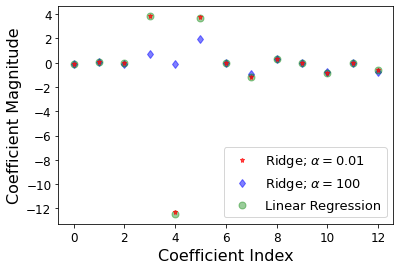

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()

# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)

newX=boston_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY=boston_df['Price']

#print type(newY)# pandas core frame

X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) 


# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles

rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

<h6>Figure 1: Ridge regression for different values of alpha is plotted to show linear regression as limiting case of ridge regression.</h6><br>Let’s understand the figure above. In X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.<p><b>Lasso Regression :</b> The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as<br><center><img src="https://miro.medium.com/max/3116/1*P5Lq5mAi4WAch7oIeiS3WA.png"><h6>Cost function for Lasso regression<h/6></center><br><center><img src="https://miro.medium.com/max/2108/1*JH9eAS2I9mwOpuFLg-gD6g.png"><h6>Supplement 2: Lasso regression coefficients; subject to similar constrain as Ridge, shown before.<h/6></center><br>Just like Ridge regression cost function, for lambda =0, the equation above reduces to equation 1.2. The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Just like Ridge regression the regularization parameter (lambda) can be controlled and we will see the effect below using cancer data set in sklearn. Reason I am using cancer data instead of Boston house data, that I have used before, is, cancer data-set have 30 features compared to only 13 features of Boston house data. So feature selection using Lasso regression can be depicted well by changing the regularization parameter.<br><center><img src="https://miro.medium.com/max/1050/1*9gPxjrEAkqWV5tzPEgSkZw.png"><h6>Figure 2: Lasso regression and feature selection dependence on the regularization parameter value.<h/6></center><br>

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726227
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936698
test score for alpha =0.0001:  0.7318608210757911
number of features used: for alpha =0.0001: 22
LR training score: 0.784220619405507
LR test score:  0.7329325010888702


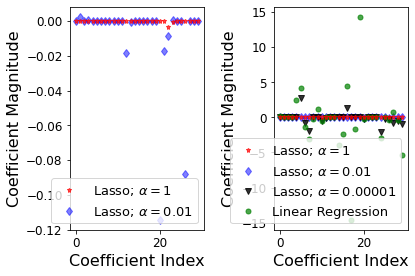

In [2]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#print cancer_df.head(3)
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Let’s understand the plot and the code in a short summary.<ul>
<li>The default value of regularization parameter in Lasso regression (given by α) is 1.</li>
<li>With this, out of 30 features in cancer data-set, only 4 features are used (non zero value of the coefficient).</li>
<li>Both training and test score (with only 4 features) are low; conclude that the model is under-fitting the cancer data-set.</li>
<li>Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =10, training and test score increases.</li>
<li>Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. </li><li>For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.</li>
<li>Further reduce α =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.</li>
<li>In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.</li>
    </ul><br><p>
    <b>How Lasso Regularization Leads to Feature Selection?</b><br>So far we have gone through the basics of Ridge and Lasso regression and seen some examples to understand the applications. Now, I will try to explain why the Lasso regression can result in feature selection and Ridge regression only reduces the coefficients close to zero, but not zero. An illustrative figure below will help us to understand better, where we will assume a hypothetical data-set with only two features. Using the constrain for the coefficients of Ridge and Lasso regression (as shown above in the supplements 1 and 2), we can plot the figure below<br><center><img src="https://miro.medium.com/max/2116/1*Jd03Hyt2bpEv1r7UijLlpg.png"><h6>Figure 3: Why LASSO can reduce dimension of feature space? Example on 2D feature space.<h/6></center><br>For a two dimensional feature space, the constraint regions (see supplement 1 and 2) are plotted for Lasso and Ridge regression with cyan and green colours. The elliptical contours are the cost function of linear regression (eq. 1.2). Now if we have relaxed conditions on the coefficients, then the constrained regions can get bigger and eventually they will hit the centre of the ellipse. This is the case when Ridge and Lasso regression resembles linear regression results. Otherwise, <b>both methods determine coefficients by finding the first point where the elliptical contours hit the region of constraints. The diamond (Lasso) has corners on the axes, unlike the disk, and whenever the elliptical region hits such point, one of the features completely vanishes!</b> For higher dimensional feature space there can be many solutions on the axis with Lasso regression and thus we get only the important features selected.<br>Finally to end this meditation, let’s summarize what we have learnt so far<br><ol><li>Cost function of Ridge and Lasso regression and importance of regularization term.</li>
<li>Went through some examples using simple data-sets to understand Linear regression as a limiting case for both Lasso and Ridge regression.</li>
<li>Understood why Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.</li></ol>